In [1]:
import random
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import json
from datetime import datetime

# Set the city name or coordinates for Gurgaon
place_name = "Gurgaon, India"

# Download the street network
gurugram_graph = ox.graph_from_place(place_name, network_type="all")

In [2]:
# Create a GeoDataFrame with your polygon
study_area = gpd.read_file('geodata/study_area.csv')

# Project the GeoDataFrame to the same CRS as the graph
study_area = study_area.set_crs(gurugram_graph.graph['crs'])

In [3]:
study_area

,WKT,name,description,geometry
0,"POLYGON ((77.0251972 28.4706256, 77.0306903 28...",Study Area,,"POLYGON ((77.02520 28.47063, 77.03069 28.38730..."


In [4]:
# Clip the graph to the polygon
study_area_graph = ox.graph_from_polygon(study_area.geometry[0], network_type='drive', retain_all=True)

In [5]:
dense_area = gpd.read_file('geodata/dense_area.csv')
sparse_area = gpd.read_file('geodata/sparse_area.csv')
blinkit_stores = gpd.read_file('geodata/blinkit_stores.csv')
display(blinkit_stores)

,WKT,name,description,geometry
0,POINT (77.094912 28.462015 0.0),blinkit,,POINT Z (77.09491 28.46202 0.00000)
1,POINT (77.04601 28.427039 0.0),Blinkit sector 47,,POINT Z (77.04601 28.42704 0.00000)
2,POINT (77.041041 28.461018 0.0),Blinkit online store,,POINT Z (77.04104 28.46102 0.00000)
3,POINT (77.086489 28.472832 0.0),Blinkit store,,POINT Z (77.08649 28.47283 0.00000)
4,POINT (77.072826 28.413124 0.0),Blinkit Store (Online) Sector 50,,POINT Z (77.07283 28.41312 0.00000)
5,POINT (77.056567 28.390908 0.0),BlinkIt Store(Dark Store),,POINT Z (77.05657 28.39091 0.00000)
6,POINT (77.073085 28.441506 0.0),Blinkit warehouse,,POINT Z (77.07309 28.44151 0.00000)
7,POINT (77.045226 28.402609 0.0),Blinkit Dark Store,,POINT Z (77.04523 28.40261 0.00000)
8,POINT (77.059314 28.406399 0.0),Blinkit Dark Store,,POINT Z (77.05931 28.40640 0.00000)
9,POINT (77.035943 28.417696 0.0),Blinkit store sector 48,,POINT Z (77.03594 28.41770 0.00000)


In [6]:
all_nodes = list(study_area_graph.nodes)
delivery_executives = random.choices(all_nodes, k=50)

/var/folders/lt/njk9c7vd43n4xfmcy1kt75c40000gn/T/ipykernel_34782/1131505728.py:16: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(['Service Areas', 'Delivery Executives', 'Dark Stores'])


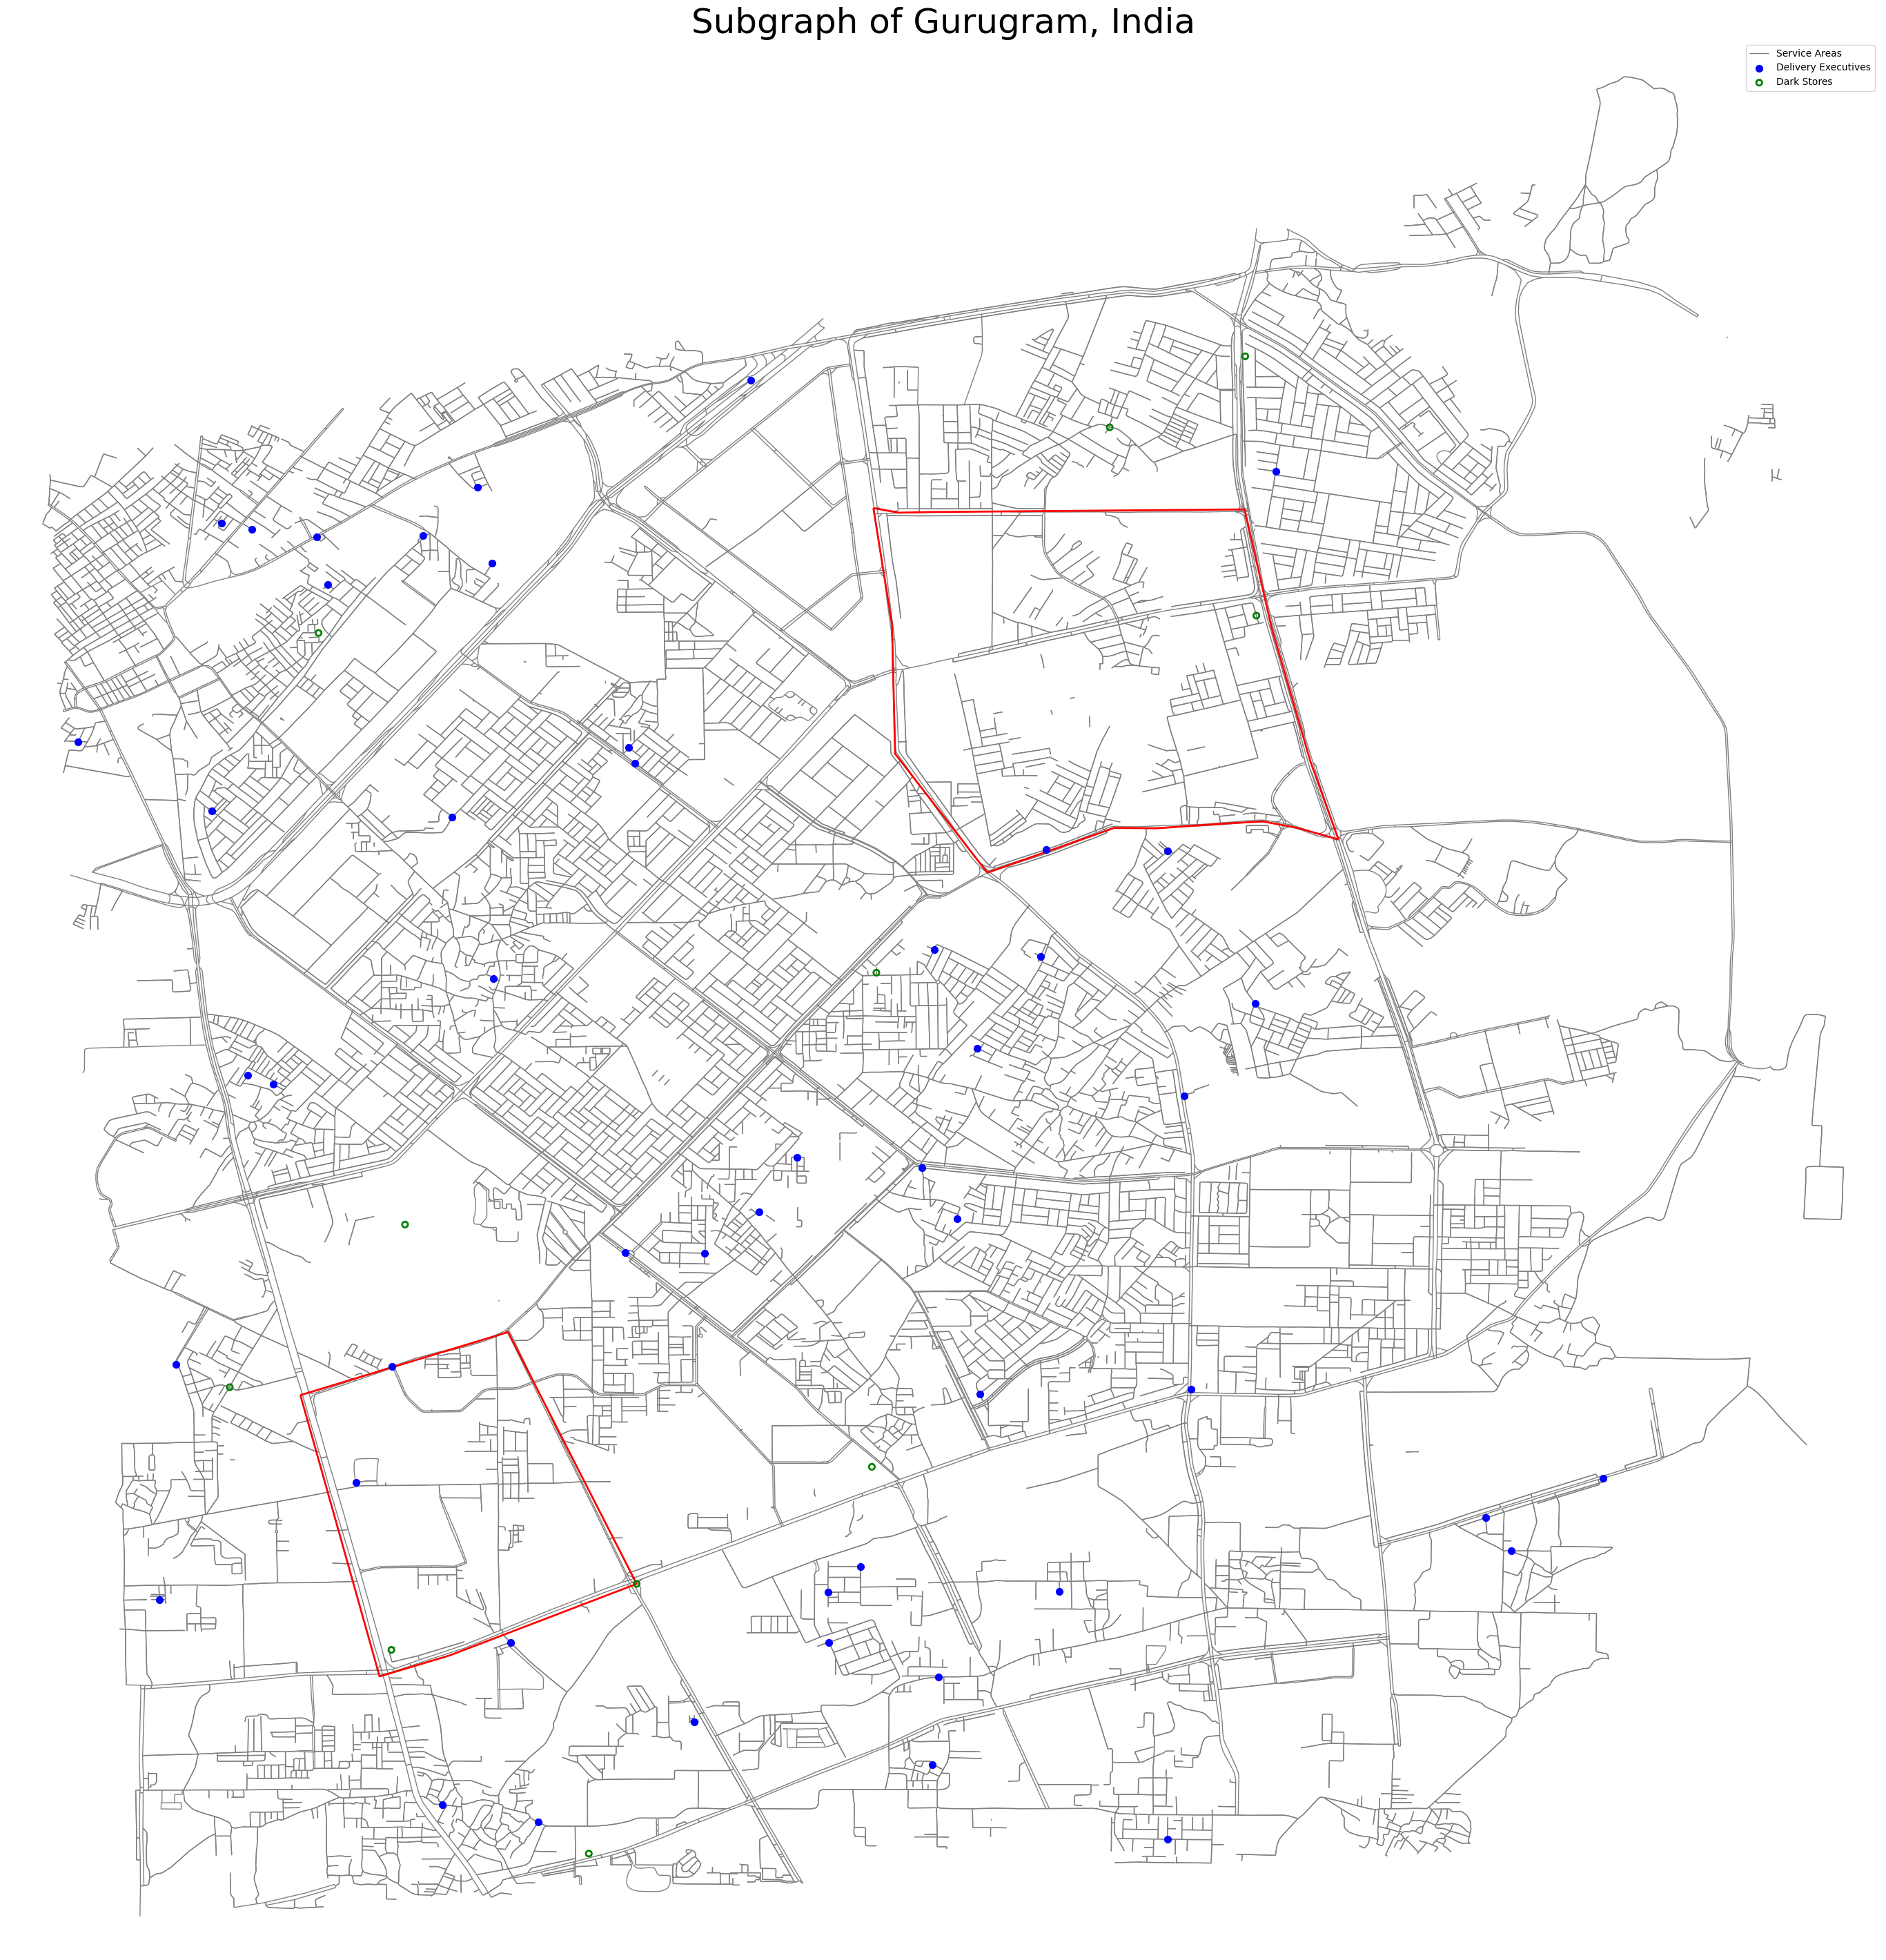

In [7]:
# fig, ax = ox.plot_graph(study_area_graph, node_size=0, edge_color="gray", bgcolor="white", show=False, figsize=(32, 18))
fig, ax = ox.plot_graph(study_area_graph, node_size=0, edge_color="gray", bgcolor="white", show=False, figsize=(64, 36))
ax.scatter(
    [study_area_graph.nodes[node]["x"] for node in delivery_executives],
    [study_area_graph.nodes[node]["y"] for node in delivery_executives],
    c="blue",
    s=50,
    zorder=4,
)

dense_area.plot(ax=ax, color="none", edgecolor="red", linewidth=2, label='Study Area')
sparse_area.plot(ax=ax, color="none", edgecolor="red", linewidth=2)
blinkit_stores.plot(ax=ax, color="none", edgecolor="green", linewidth=2)
ax.set_title("Subgraph of Gurugram, India", fontsize=36)

plt.legend(['Service Areas', 'Delivery Executives', 'Dark Stores'])
plt.show()